# **Telecom Customer Churn Prediction and Segmentation**

##### **Problem Overview**
- This project focuses on analyzing customer behavior in the telecom industry to predict churn and identify meaningful customer segments. Using classical machine learning techniques, the goal is to build predictive models that classify customers into churn or non-churn categories and segment them into groups based on shared characteristics. This analysis will empower telecom businesses to improve customer retention and tailor services to different customer segments.


- There are 21 variables and 7043 observations in the dataset. 
    - customerID - A customer’s ID

1. demographic variables:
    - gender - A customer’s gender
    - SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)
    - Partner- Whether the customer has a partner or not (Yes, No)
    - Dependents - Whether the customer has dependents or not (Yes, No)

2. variables related to the company’s services:
    - PhoneService - Whether the customer has a phone service or not (Yes, No)
    - MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)
    - InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
    - OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
    - OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
    - DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
    - TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
    - StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
    - StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)

3. contract and payment details:
    - Contract - The contract term of the customer (Month-to-month, One year, Two year)
    - PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
    - PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

4. tenure and charges details:
    - tenure - Number of months the customer has stayed with the company
    - MonthlyCharges - The amount charged to the customer monthly
    - TotalCharges - The total amount charged to the customer

5. the variable of interest:
    - Churn - Whether the customer have left the company within the last month (Yes or No)

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import stats

## **Data Reading**

In [45]:
data = pd.read_csv('../Data/Telecom Customers Churn.csv')

In [46]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [47]:
data.shape

(7043, 21)

## **Data Investigation**

##### **Problems To Investigate**
- **Data Types**
- **Columns Values**
- **Missing Values**
- **Duplicates**
- **Outliers**
- **Skewness**
- **Imbalanced Data**

##### **Data Types**

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Notes**
- **TotalCharges** column: Its datatype is object, Even though they are supposed to be numbers.
- So Column datatype should be changed for object to float

##### **Columns Values**

In [49]:
for col in data.columns[1:]:
    print(col, ": ", data[col].unique())

gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :  [29.85 56.95 53

**Notes**
- Categorial columns must be encoded like: 
    - gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Churn

##### **Missing Values**

In [50]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### **Duplicates**

In [51]:
data.duplicated().sum()

0

##### **Outliers**

**Outliers Detection**
1. Observational Method:
    - Histogram
    - Scatterplot or Pairplot
    - Boxplot
    - Distplot
2. Statistical Methods:
    - Interquartile Range (IQR)
    - Z-Score

In [52]:
print(list(data.TotalCharges.unique()))

['29.85', '1889.5', '108.15', '1840.75', '151.65', '820.5', '1949.4', '301.9', '3046.05', '3487.95', '587.45', '326.8', '5681.1', '5036.3', '2686.05', '7895.15', '1022.95', '7382.25', '528.35', '1862.9', '39.65', '202.25', '20.15', '3505.1', '2970.3', '1530.6', '4749.15', '30.2', '6369.45', '1093.1', '6766.95', '181.65', '1874.45', '20.2', '45.25', '7251.7', '316.9', '3548.3', '3549.25', '1105.4', '475.7', '4872.35', '418.25', '4861.45', '981.45', '3906.7', '97', '144.15', '4217.8', '4254.1', '3838.75', '1426.4', '1752.65', '633.3', '4456.35', '1752.55', '6311.2', '7076.35', '894.3', '7853.7', '4707.1', '5450.7', '2962', '957.1', '857.25', '244.1', '3650.35', '2497.2', '930.9', '887.35', '49.05', '1090.65', '7099', '1424.6', '177.4', '6139.5', '2688.85', '482.25', '2111.3', '1216.6', '79.35', '565.35', '496.9', '4327.5', '973.35', '918.75', '2215.45', '1057', '927.1', '1009.25', '2570.2', '74.7', '5714.25', '7107', '7459.05', '927.35', '4748.7', '113.85', '1107.2', '2514.5', '19.45', '

In [53]:
data[['PaymentMethod', 'MonthlyCharges', 'TotalCharges']][data.TotalCharges == ' ']

,PaymentMethod,MonthlyCharges,TotalCharges
488,Bank transfer (automatic),52.55,
753,Mailed check,20.25,
936,Mailed check,80.85,
1082,Mailed check,25.75,
1340,Credit card (automatic),56.05,
3331,Mailed check,19.85,
3826,Mailed check,25.35,
4380,Mailed check,20.00,
5218,Mailed check,19.70,
6670,Mailed check,73.35,


In [54]:
data[['PaymentMethod', 'MonthlyCharges', 'TotalCharges']][data.TotalCharges == '  ']

,PaymentMethod,MonthlyCharges,TotalCharges


In [55]:
df = data.copy()

In [56]:
df['TotalCharges'] = np.where(df['TotalCharges'] == ' ', df['MonthlyCharges'], df['TotalCharges'])

In [57]:
df[['PaymentMethod', 'MonthlyCharges', 'TotalCharges']][data.TotalCharges == ' ']

,PaymentMethod,MonthlyCharges,TotalCharges
488,Bank transfer (automatic),52.55,52.55
753,Mailed check,20.25,20.25
936,Mailed check,80.85,80.85
1082,Mailed check,25.75,25.75
1340,Credit card (automatic),56.05,56.05
3331,Mailed check,19.85,19.85
3826,Mailed check,25.35,25.35
4380,Mailed check,20.00,20.0
5218,Mailed check,19.70,19.7
6670,Mailed check,73.35,73.35


In [58]:
df.TotalCharges = df.TotalCharges.astype('float')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


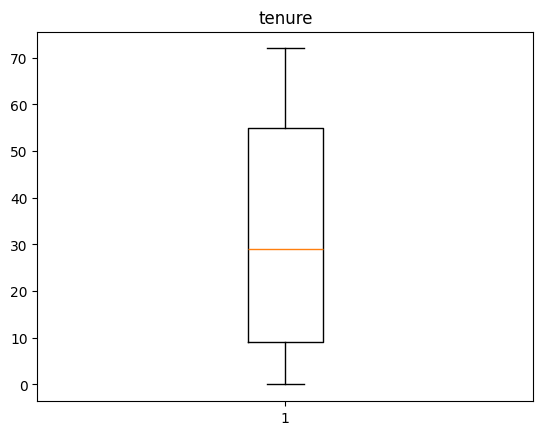

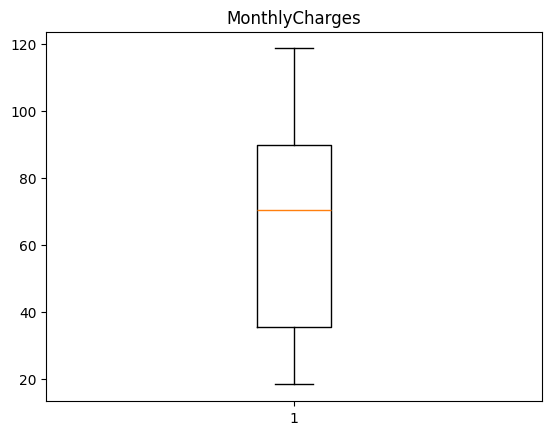

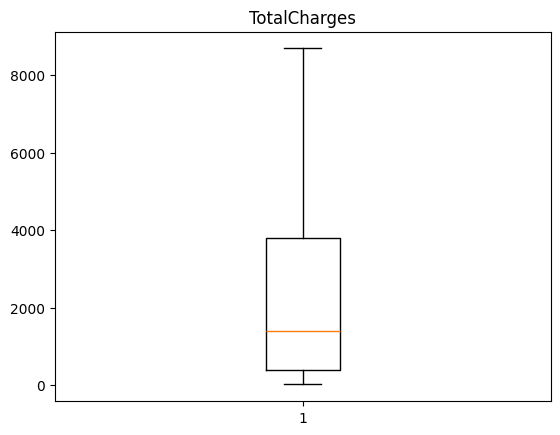

In [60]:
for column in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    plt.boxplot(df[column])
    plt.title(column)
    plt.show()

**Notes**
- **tenure, MonthlyCharges, TotalCharges**: the three numerical columns that maybe contain outliers.
- Some rows in **TotalCharges** column had contained space string " ", So firstly theses values " " was replaced by numbers to can convert the column datatype into float, So the outliers detection is valid.
- So far, I have chosen the minimum value to replace " " in **TotalCharges** which is the corresponding value in **MonthlyCharges**.

##### **Skewness**

**Skewness Detection**
1. Observational Method: 
    - Using Graphs -> such as i did (distplot)
2. Statistical Methods: 
    - Using Formula -> skewness = (3 * (Mean - Median)) / Standard Deviation
    - Pandas **skew()** function for calculating skewness for each column.
        - 1 or more -> Highly Left Skewness.
        - -1 or more -> Hoghly Right Skewness.
        - 0 -> No Skewness

In [61]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963316
dtype: float64

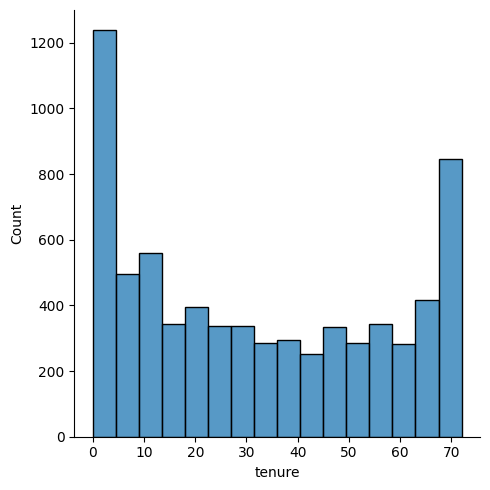

In [62]:
sns.displot(df.tenure)

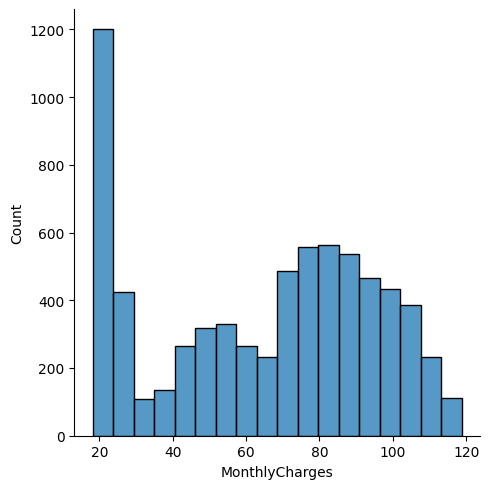

In [63]:
sns.displot(df.MonthlyCharges)

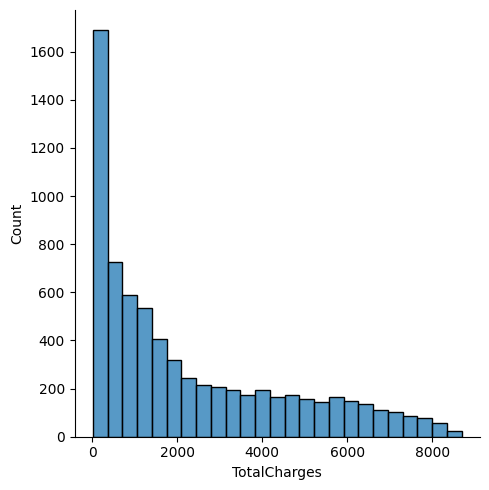

In [64]:
sns.displot(df.TotalCharges)

##### **Imbalanced Data**

In [65]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn'>

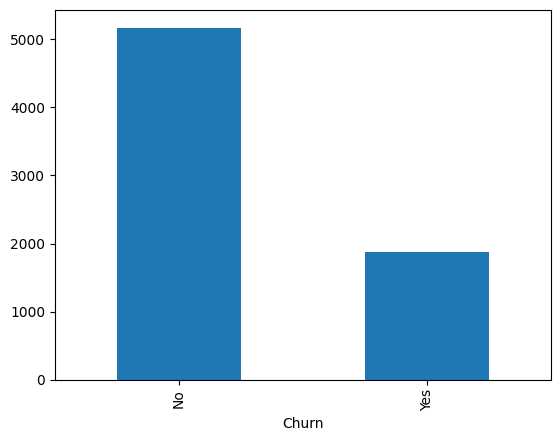

In [66]:
df.Churn.value_counts().plot(kind='bar')

### **Investigation Notes**
- **Unimportant Features**: Remove unimportant features like ID
- **Data Types**: Only **TotalCharges** column datatype should be converted from object into float.
- **Columns Values**: Categorial columns must be encoded into numerical
- **Missing Values**: No missing values, but can treat the " " values in TotalCharges column as a missing values
- **Duplicates**: No duplicates
- **Outliers**: No Outliers
- **Skewness**: **TotalCharges** and **MonthlyCharges** columns are skewed
- **Imbalanced Data**: Data is imbalanced

## **Data Preprocessing**

##### **Unimportant Features**

In [67]:
df = df.drop(columns=['customerID'])

In [68]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


##### **Data Types**

- To convert **TotalCharges** datatype into float, firstly it's must to replace " " values, which can be treated as missing values.

**Missing Values Handling**
  - Deletion.
    1. Pairwise Delection: when values are missing completely at random (MCAR). -> only the missing values are deleted.
    2. Listwise Deletion/ Dropping Rows: MCAR also -> complete rows the contain themissing values are deleted.
    3. Dropping Complete Columns: when nulls are about 80% or more and the feature isn't important.

  - Imputation for Non Time Series Data.
    1. Using Constant.
    2. Using Statistics: Mean, Median, Mode
      - **SimpleImputer()**: class in sklearn with above options
    
  - Imputation for Time Series Data.
    1. 'ffill' or 'pad': Replace nulls with last observed values.
    2. 'bfill' or 'backfill': Replace nulls with next obseved values.
    - **fillna()**: function in pandas with above options for parameter **method**.
    3. Linear Interpolation Method: technique that assumes linear relationship among data points and utilises non-missing values from adjacent data points to compute a value for a minssing data point.
    - **interpolate()**: function in pandas.

  - Advanced Imputation Techniques.
    - Using ML Algorithms to impute missing values.
    1. Nearest Neighbors Imputation: Use **KNNImputer()**: Class in **sklearn.impute**
    2. Multivariante Imputation by Chained Equations

  - Algorithms Handle Missing Values without Any Preprocessing.
    1. XGBoost
    2. LightGBm

**Notes**
- I have selected imputation using constant (corresponding value in **MonthlyCharges**) to handle the missing values.
- Because for sure the value that should be instead of " " in **TotalCharges** is corresponding value in **MonthlyCharges** as minimum or more.
- So I will adopt what I handled in dataframe **df**

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


##### **Column Values**

- Categorial columns must be encoded like: 
    - gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Churn

- Encoding Techniques

    - **Label Encoding**
        - Applied to columns with exactly two unique values (binary columns).
        - Converts categories into numerical values (0 and 1).
        - Binary columns:
            - `gender`
            - `Partner`
            - `Dependents`
            - `PhoneService`
            - `PaperlessBilling`
            - `Churn`
    - **One-Hot Encoding**
        - Applied to columns with more than two unique values (non-binary columns).
        - Converts each category into separate binary columns.
        - `drop='first'` to avoid the dummy variable trap.
        - Non-binary columns:
            - `MultipleLines`
            - `OnlineSecurity`
            - `OnlineBackup`
            - `DeviceProtection`
            - `TechSupport`
            - `StreamingTV`
            - `StreamingMovies`
            - `InternetService`
            - `Contract`
            - `PaymentMethod`

In [70]:
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

In [71]:
for col in categorical_columns:
    print(col, ": ", df[col].unique())

gender :  ['Female' 'Male']
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :  ['No' 'Yes']


In [72]:
df[['PhoneService', 'MultipleLines']][df.PhoneService == 'No']

,PhoneService,MultipleLines
0,No,No phone service
3,No,No phone service
7,No,No phone service
20,No,No phone service
27,No,No phone service
...,...,...
7003,No,No phone service
7007,No,No phone service
7029,No,No phone service
7036,No,No phone service


In [73]:
df.PhoneService[df.PhoneService == 'No'].unique()

array(['No'], dtype=object)

In [74]:
df.PhoneService[df.MultipleLines == 'No phone service'].unique()

array(['No'], dtype=object)

#### **Feature Selection Step (#1)**
- **PhoneService** column carries the same information that exists in **MultipleLines** column (When value equals **"No phone service"**)
- So, I will remove a **PhoneService Column**.

In [75]:
df = df.drop(columns='PhoneService')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [77]:
binary_columns = [
    'Partner', 'Dependents',
    'PaperlessBilling', 'Churn'
]

semi_binary_columns = [
    'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 
    'StreamingTV', 'StreamingMovies'
]

ordinal_coulmns = [
    'Contract'
]

ohe_columns = [
    'MultipleLines', 'InternetService', 'PaymentMethod'
]

In [78]:
len(df['Churn'].unique())

2

In [79]:
def encode(column):
    if len(df[column].unique()) == 2:
        df[column] = df[column].replace({'No': 0, 'Yes': 1})
    else:
        df[column] = df[column].replace({'No': 0, 'No internet service': 0, 'Yes': 1})
    df[column] = df[column].astype(int)

In [81]:
df.gender = df.gender.replace({'Female': 0, 'Male': 1})

for col in binary_columns:
    encode(col)

for col in semi_binary_columns:
    encode(col)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   int32  
 8   OnlineBackup      7043 non-null   int32  
 9   DeviceProtection  7043 non-null   int32  
 10  TechSupport       7043 non-null   int32  
 11  StreamingTV       7043 non-null   int32  
 12  StreamingMovies   7043 non-null   int32  
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   int32  
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [83]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0


In [85]:
df['Contract'] = df['Contract'].replace({'Month-to-month': 1, 'One year': 12, 'Two year': 24})
df['Contract'] = df['Contract'].astype(int)

In [86]:
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = ohe.fit_transform(df[ohe_columns])

encoded_columns = ohe.get_feature_names_out(ohe_columns)

encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
df_encoded = pd.concat([df.drop(columns=ohe_columns), encoded_df], axis=1)


In [87]:
df_encoded.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,0,0,...,29.85,29.85,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,34,1,0,1,0,0,...,56.95,1889.50,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


##### **Missing Values**
- Already i handled it in Data Types To can convert from object to float. 

##### **Duplicates**
- No Duplicates

##### **Outliers**
- No Outliers

##### **Skewness**
- Function Transformation
    1. Log Transformation
        - Not applied to those features wi negative values.
        - Right-skewed data.
    2. Reciprocal
        - Not defined for zero.
    3. Square
        - Applies to left-skewed data.
    4. Square Root
        - Only for positive numbers.
        - Weaker than Log Transformation.
        - Reducing the skewness of right-skewed data.
- Power Transformation
    1. Box-Cox
        - Data should be positive(not even zero is acceptable).
        - Sqrt - Log
    2. Yeo-Johnson
        - Data have zeroes or negative value.
- Quantile transformation

**Note:**
- I will prefer firstly to apply the clustering algorithms and visualize the clusters and then handle the skewness.

#### Note:
- Return after using Kmeans and T-SNE to visualize the data.
- The **TotalCharges** Column is right skewed and **MonthlyCharges** also, So I will use Transformation that handle right skewness data like **Log Transformation**.

In [88]:
df_log = df_encoded.copy()
df_log.TotalCharges = np.log(df_log.TotalCharges + 1)
df_log.MonthlyCharges = np.log(df_log.MonthlyCharges + 1)
df_log.tenure = np.log(df_log.tenure + 1)
df_log.Contract = np.log(df_log.Contract + 1)

In [89]:
print("Before Log Transformation", f": [{np.min(df_encoded.TotalCharges)}, {np.max(df_encoded.TotalCharges)}]")
print("After Log Transformation", f": [{np.min(df_log.TotalCharges)}, {np.max(df_log.TotalCharges)}]")

Before Log Transformation : [18.8, 8684.8]
After Log Transformation : [2.9856819377004897, 9.069444787271305]


In [90]:
print("Before Log Transformation", f": [{np.min(df_encoded.MonthlyCharges)}, {np.max(df_encoded.MonthlyCharges)}]")
print("After Log Transformation", f": [{np.min(df_log.MonthlyCharges)}, {np.max(df_log.MonthlyCharges)}]")

Before Log Transformation : [18.25, 118.75]
After Log Transformation : [2.9575110607337933, 4.785406236291025]


In [92]:
df_log.to_csv("Telecom_Customers_Churn_Processed_Log.csv", index=False)

In [ ]:
df_encoded.TotalCharges = np.sqrt(df_encoded.TotalCharges)
df_encoded.TotalCharges = np.cbrt(df_encoded.TotalCharges)
df_encoded.TotalCharges = 1 / (df_encoded.TotalCharges)
df_encoded.TotalCharges = stats.boxcox(df_encoded.TotalCharges)

In [ ]:
df_encoded.TotalCharges = np.cbrt(df_encoded.TotalCharges)
df_encoded.to_csv("Telecom_Customers_Churn_Processed_Cbrt.csv", index=False)

In [ ]:
df_encoded.TotalCharges = 1 / (df_encoded.TotalCharges)
df_encoded.to_csv("Telecom_Customers_Churn_Processed_Reciprocal.csv", index=False)

In [ ]:
df_encoded.TotalCharges = stats.boxcox(df_encoded.TotalCharges)
df_encoded.to_csv("Telecom_Customers_Churn_Processed_Boxcox.csv", index=False)

**Note**
- **Because I want to try different types of transformation, i will try all these ones and visualize the result using T-SNE in Model Notebook to can compare among them.**

##### **Imbalanced Data**

1. **Resampling Techniques**

   - **Oversampling Minority Class**: 
      - **Random Over-sampling**: which makes random duplicates.
      - **SMOTE (Synthetic Minority Over-sampling Technique)**: which generates synthetic samples for the minority class.
      - **ADASYN (Adaptive Synthetic Sampling)**: generate synthetic samples for the minority class to balance the dataset.

   - **Undersampling Majority Class**: 
      - **Random Under-sampling**: which remove random points or instances.
      - **NearMiss**: This is a method that selects examples from the majority class that have the smallest average distance to the three closest instances from the minority class.
      - **Tomek Links**: This method removes majority instances that are close to minority instances, aiming to increase the space between the two classes to improve classification.
      - **Cluster Centroids**: This method replaces clusters of majority instances with the cluster centroids, essentially creating synthetic examples.

   - **Hybrid Methods**: 
      - Combining both oversampling the minority class and undersampling the majority class to maintain balance without losing much information (e.g., **SMOTE + Tomek links**).

2. **Algorithmic Techniques**
   - **Cost-Sensitive Learning**: Many algorithms can be made cost-sensitive, where misclassification penalties for the minority class are increased. This ensures that the model pays more attention to the minority class.
   - **Class Weighting**: In algorithms like SVM, Random Forest, or Neural Networks, you can assign different weights to different classes, giving more weight to the minority class.

3. **Anomaly Detection**
   - In cases where the imbalance is extreme (like fraud detection), you can treat the problem as an anomaly detection task, where the minority class represents rare events.

4. **Ensemble Methods**
   - **Bagging and Boosting**: Techniques like **Random Forest** (bagging) or **XGBoost** (boosting) can be used, as these methods combine multiple models to reduce variance and handle imbalanced data effectively.
   - **Balanced Random Forest**: A variant of the Random Forest where each tree is trained on a balanced subset of the data (by undersampling the majority class).

5. **Evaluation Metrics**
   - When dealing with imbalanced data, using standard metrics like **accuracy** can be misleading. Instead, focus on:
     - **Precision, Recall, F1-Score**: These metrics focus on performance for the minority class.
     - **ROC-AUC**: Measures how well the model distinguishes between classes.
     - **Precision-Recall AUC**: More informative than ROC-AUC when dealing with imbalanced datasets.

6. **Synthetic Data Generation**
   - In some scenarios, generating synthetic data using techniques like **GANs (Generative Adversarial Networks)** could help improve the balance and diversity of the dataset, though this can be more complex to implement.

**Note:**
- As a clustering problem, I will prefer not to handle the imbalancing data.
- As a classification problem, It's must to handle it. And i prefer one of those:
    1. **Hybrid Methods** 
    2. **Ensemle Methods**

-------------------------------------------------------

### **Saving Processed Data**

In [197]:
df_encoded.to_csv("Telecom_Customers_Churn_Processed.csv", index=False)

### **Exploratory Data Analysis (EDA)**

In [200]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int32  
 3   Dependents                             7043 non-null   int32  
 4   tenure                                 7043 non-null   int64  
 5   OnlineSecurity                         7043 non-null   int32  
 6   OnlineBackup                           7043 non-null   int32  
 7   DeviceProtection                       7043 non-null   int32  
 8   TechSupport                            7043 non-null   int32  
 9   StreamingTV                            7043 non-null   int32  
 10  StreamingMovies                        7043 non-null   int32  
 11  Pape

In [201]:
corr = df_encoded.corr()

In [202]:
df_encoded.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

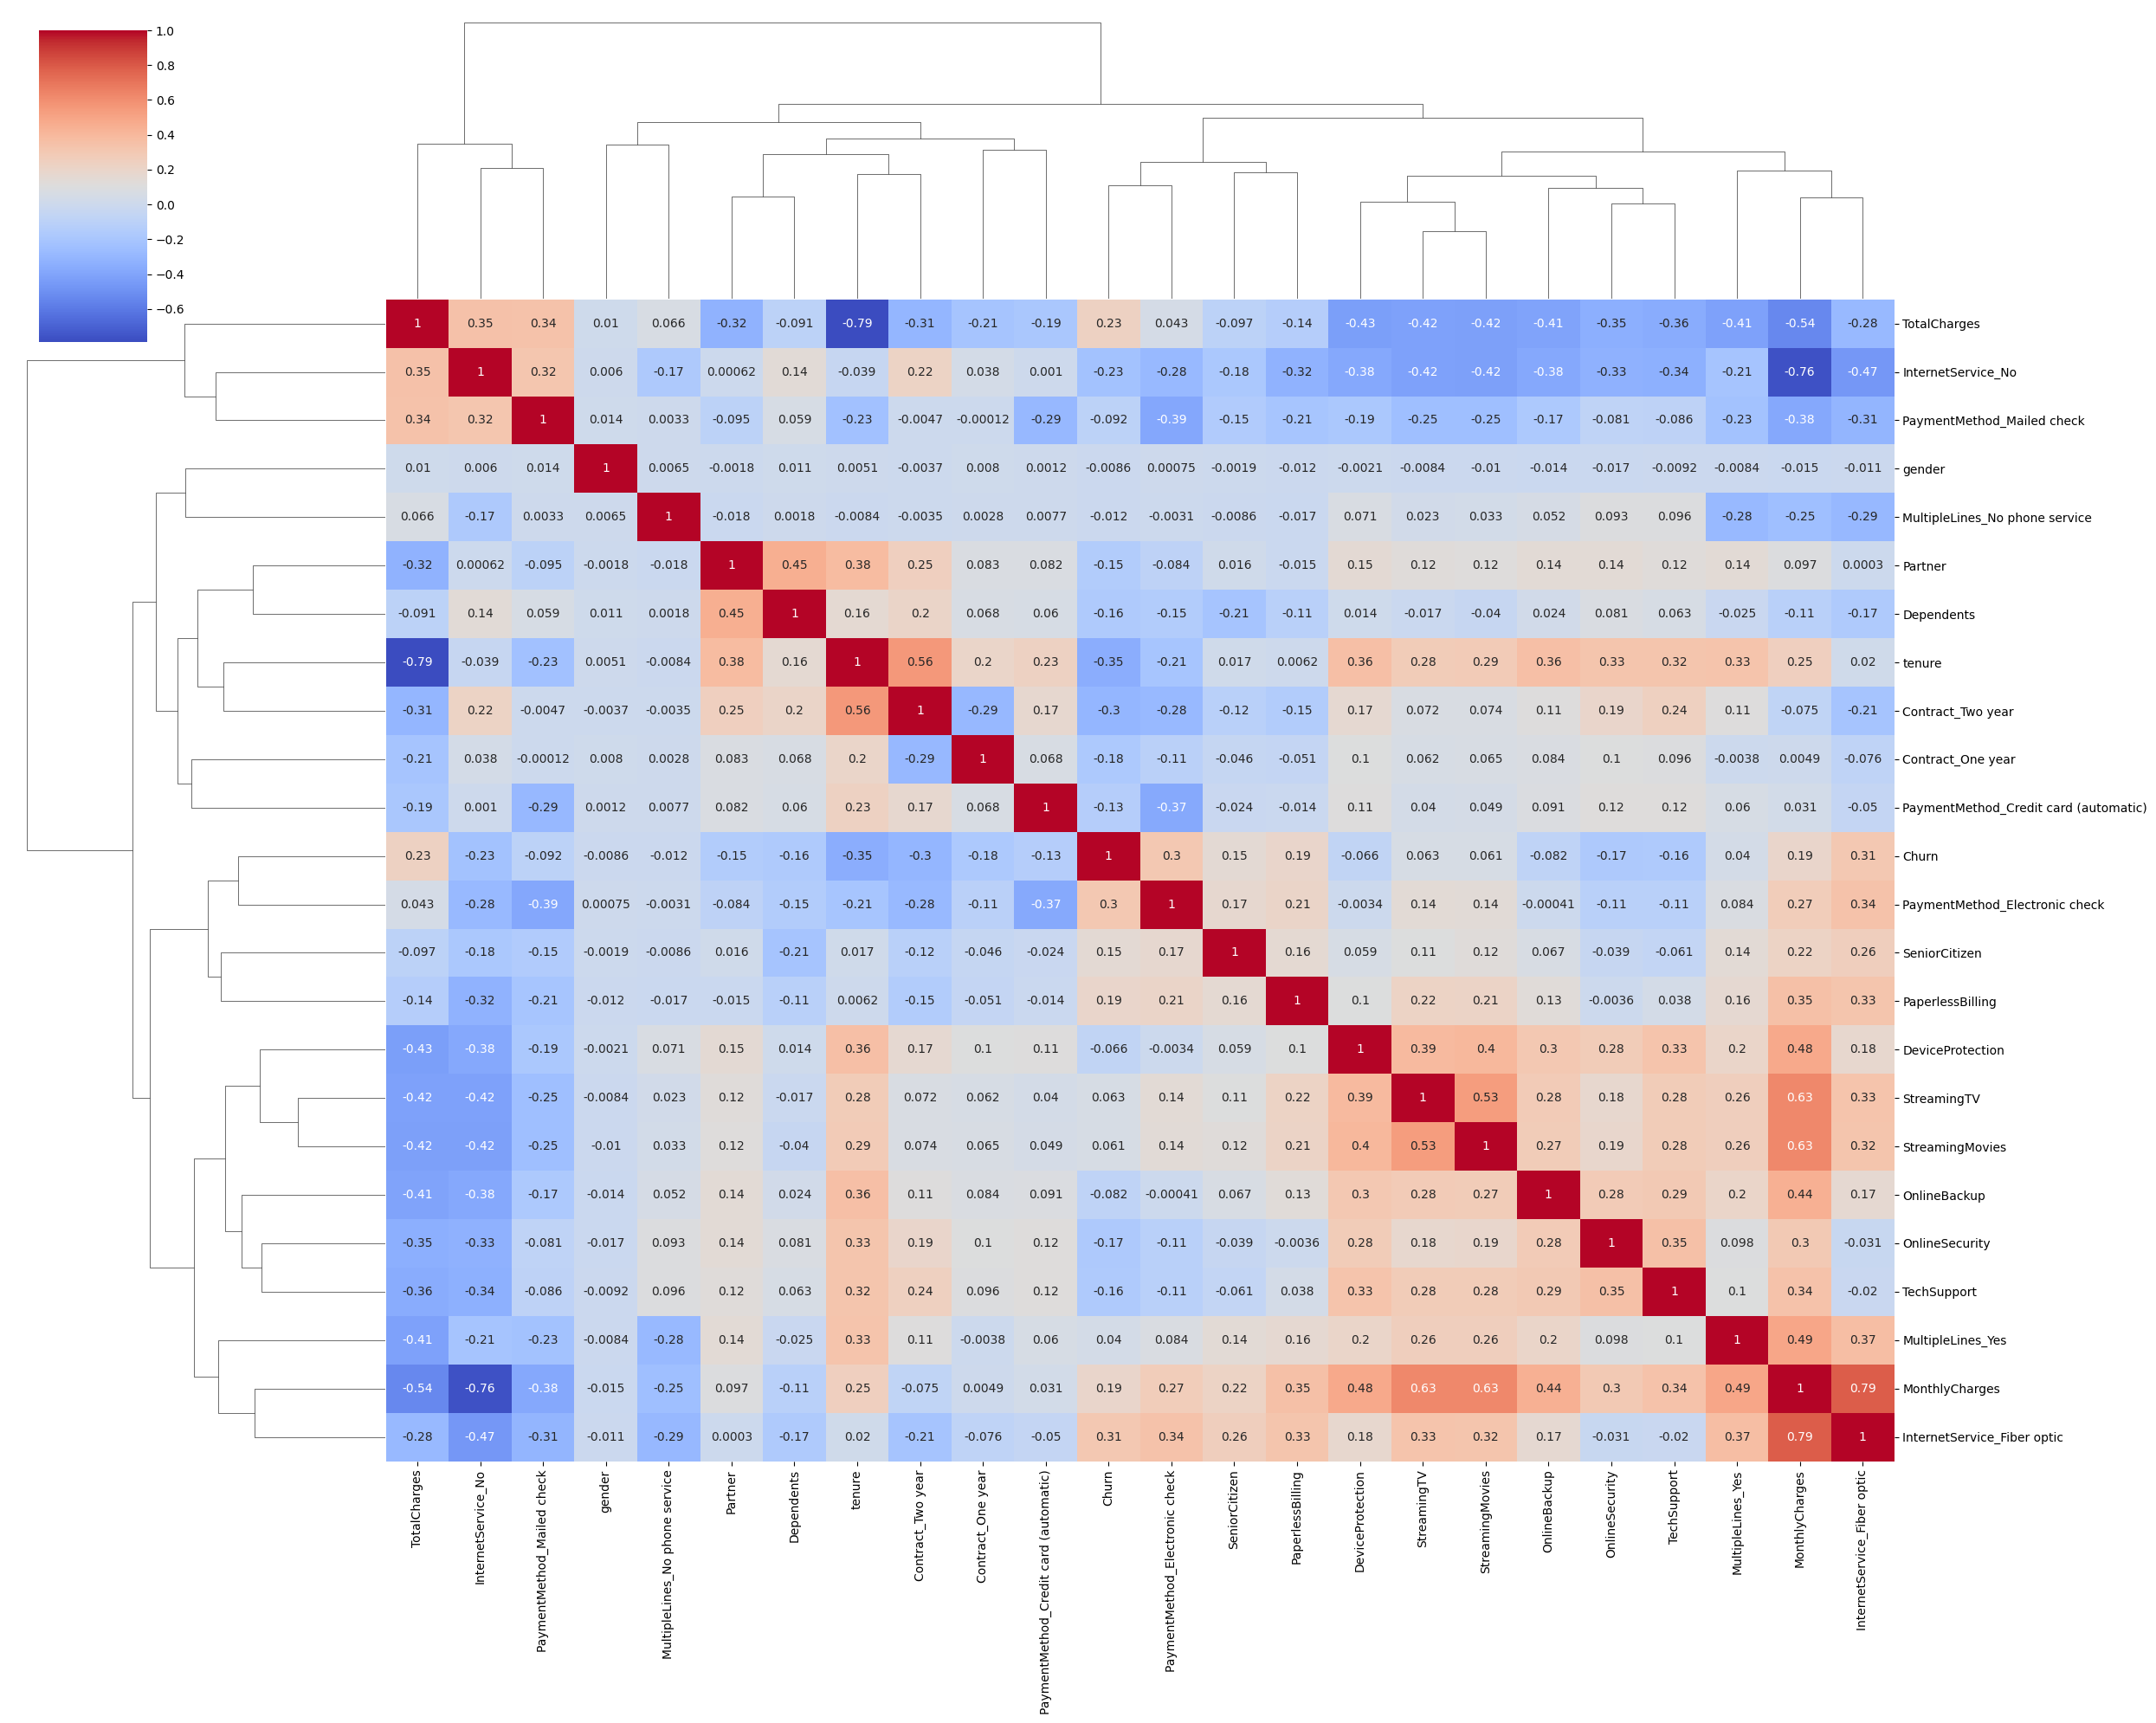

In [203]:
sns.clustermap(corr, annot=True, figsize=(25, 20), cmap="coolwarm")
plt.show()